<a href="https://colab.research.google.com/github/raylinpeguero78/Nomina-de-Sector-publico/blob/main/Nomina_de_empleado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn. tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('nomina.csv', encoding='latin-1', on_bad_lines='skip',sep=';')




In [69]:
data.head()
data['SALARIO BRUTO']

0        25000.0
1         5117.5
2         9000.0
3        25000.0
4        12500.0
          ...   
72642    50000.0
72643    45000.0
72644    35000.0
72645    35000.0
72646    28000.0
Name: SALARIO BRUTO, Length: 72647, dtype: float64

In [5]:
data.head(10)

,NOMBRE DEL DEPARTAMENTO,NOMBRE DEL PUESTO,GRUPO OCUPACIONAL,NOMBRES Y APELLIDOS,SEXO,SALARIO BRUTO,ESTATUS NOMINAL,MES,AÑO
0,GERENCIA INGENIERIA,SUB-ENCARGADO (A),POR DEFINIR,ABRAHAM LEONARDO SARRAFF GUZMAN,M,25000.0,FIJO,Abril,2018
1,DIRECCION COMERCIAL,REPRESENTANTE COMERCIAL,II,ABRAHAM SANCHEZ,M,5117.5,FIJO,Abril,2018
2,DIRECCION JURIDICA,AUXILIAR,II,ABRAHAN MARTE DUARTE,M,9000.0,FIJO,Abril,2018
3,DEPTO. DE RELACIONES LABORALES,SECRETARIA,POR DEFINIR,ABRIL DEL PILAR PEÑA ABREU,F,25000.0,FIJO,Abril,2018
4,DEPTO. DE AGENCIA DE SANTIAGO,CAJERO VENDEDOR,III,ADALBERTO JOAQUIN RODRIGUEZ CABA,M,12500.0,FIJO,Abril,2018
5,DIR. DE PRODUCCION DE SORTEOS,MENSAJERO ( A ),ESTATUTO SIMPLIFICADO,ADALGISA ALTAGRACIA CASTRO,F,9500.0,CARRERA,Abril,2018
6,DEPTO. IMPRESOS,ENCARGADA DE BOVEDA,II,ADALGIZA FERMIN GARCIA,F,10000.0,CARRERA,Abril,2018
7,DEPTO. SERVICIOS GENERALES,AUXILIAR,II,ADELAIDA PIÑA,F,13000.0,FIJO,Abril,2018
8,SANTO DOMINGO NORTE,REPRESENTANTE COMERCIAL,POR DEFINIR,ADELINA PEREZ DE LA CRUZ,F,30000.0,FIJO,Abril,2018
9,DEPTO. DE INSPECCION,INSPECTOR (A),III,ADRIANA CARVAJAL BAUTISTA,F,15000.0,FIJO,Abril,2018


In [8]:
data.dtypes

NOMBRE DEL DEPARTAMENTO     object
NOMBRE DEL PUESTO           object
GRUPO OCUPACIONAL           object
NOMBRES Y APELLIDOS         object
SEXO                       float64
SALARIO BRUTO              float64
ESTATUS NOMINAL            float64
MES                        float64
AÑO                          int64
dtype: object

In [7]:
data['SALARIO BRUTO'] = pd.to_numeric(data['SALARIO BRUTO'], errors='coerce')
data['SEXO'] = pd.to_numeric(data['SEXO'], errors='coerce')
data['ESTATUS NOMINAL'] = pd.to_numeric(data['ESTATUS NOMINAL'], errors='coerce')
data['MES'] = pd.to_numeric(data['MES'], errors='coerce')
data['AÑO'] = pd.to_numeric(data['AÑO'], errors='coerce')


In [117]:
# Seleccionar las columnas deseadas
#data_2 = data[['SALARIO BRUTO', 'SEXO', 'ESTATUS NOMINAL', 'MES', 'AÑO']]
nombres_columnas = {'ESTATUS NOMINAL': 'mes'}
data_2 = pd.get_dummies(data_2, columns=['MES'])
data_2= data_2.rename(columns=nombres_columnas)
print(data_2)


# Mostrar los primeros cinco conjuntos de datos
print(data_2.head())


       SALARIO BRUTO   AÑO  ESTATUS NOMINAL_FIJO  SEXO_F  SEXO_M  MES_Abril  \
0            25000.0  2018                     1       0       1          1   
1             5117.5  2018                     1       0       1          1   
2             9000.0  2018                     1       0       1          1   
3            25000.0  2018                     1       1       0          1   
4            12500.0  2018                     1       0       1          1   
...              ...   ...                   ...     ...     ...        ...   
72642        50000.0  2023                     1       1       0          0   
72643        45000.0  2023                     1       0       1          0   
72644        35000.0  2023                     1       0       1          0   
72645        35000.0  2023                     1       0       1          0   
72646        28000.0  2023                     1       0       1          0   

       MES_Agosto  MES_Diciembre  MES_Enero  MES_Fe

In [118]:
data_2.describe()

,SALARIO BRUTO,AÑO,ESTATUS NOMINAL_FIJO,SEXO_F,SEXO_M,MES_Abril,MES_Agosto,MES_Diciembre,MES_Enero,MES_Febrero,MES_Julio,MES_Junio,MES_Marzo,MES_Mayo,MES_Noviembre,MES_Octubre,MES_Septiembre
count,72647.000000,72647.000000,72647.000000,72647.000000,72647.000000,72647.000000,72647.000000,72647.000000,72647.000000,72647.000000,72647.000000,72647.000000,72647.000000,72647.000000,72647.000000,72647.000000,72647.000000
mean,26628.580696,2020.304885,0.803791,0.547235,0.452765,0.090203,0.086707,0.085000,0.072570,0.071937,0.088015,0.087891,0.071249,0.089020,0.085688,0.084449,0.087271
std,22926.299272,1.720377,0.397131,0.497767,0.497767,0.286475,0.281407,0.278884,0.259431,0.258385,0.283318,0.283138,0.257241,0.284774,0.279905,0.278063,0.282234
min,1.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15000.000000,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18150.000000,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28875.000000,2022.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,187500.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
columna_eliminar =['ESTATUS NOMINAL_NOMBRADO POR DECRETO',	'ESTATUS NOMINAL_PERIODO DE PRUEBA']
data_2 = data_2.drop(columns=columna_eliminar, axis=1)



In [119]:
data_2

,SALARIO BRUTO,AÑO,ESTATUS NOMINAL_FIJO,SEXO_F,SEXO_M,MES_Abril,MES_Agosto,MES_Diciembre,MES_Enero,MES_Febrero,MES_Julio,MES_Junio,MES_Marzo,MES_Mayo,MES_Noviembre,MES_Octubre,MES_Septiembre
0,25000.0,2018,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,5117.5,2018,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,9000.0,2018,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,25000.0,2018,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,12500.0,2018,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72642,50000.0,2023,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
72643,45000.0,2023,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
72644,35000.0,2023,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
72645,35000.0,2023,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0


array([[<Axes: title={'center': 'SALARIO BRUTO'}>,
        <Axes: title={'center': 'AÑO'}>,
        <Axes: title={'center': 'ESTATUS NOMINAL_FIJO'}>,
        <Axes: title={'center': 'SEXO_F'}>],
       [<Axes: title={'center': 'SEXO_M'}>,
        <Axes: title={'center': 'MES_Abril'}>,
        <Axes: title={'center': 'MES_Agosto'}>,
        <Axes: title={'center': 'MES_Diciembre'}>],
       [<Axes: title={'center': 'MES_Enero'}>,
        <Axes: title={'center': 'MES_Febrero'}>,
        <Axes: title={'center': 'MES_Julio'}>,
        <Axes: title={'center': 'MES_Junio'}>],
       [<Axes: title={'center': 'MES_Marzo'}>,
        <Axes: title={'center': 'MES_Mayo'}>,
        <Axes: title={'center': 'MES_Noviembre'}>,
        <Axes: title={'center': 'MES_Octubre'}>],
       [<Axes: title={'center': 'MES_Septiembre'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

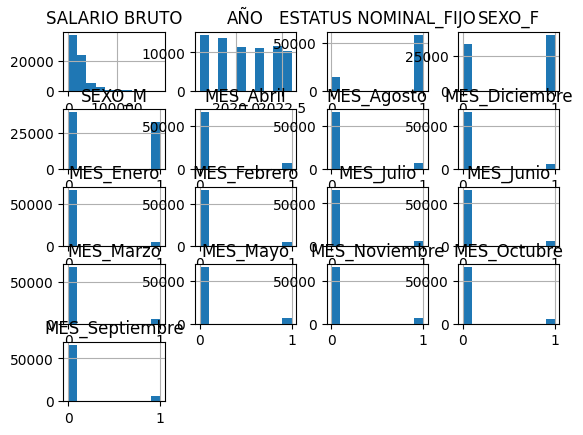

In [120]:
data_2.hist()

In [121]:
data_2.isna().sum()

SALARIO BRUTO           0
AÑO                     0
ESTATUS NOMINAL_FIJO    0
SEXO_F                  0
SEXO_M                  0
MES_Abril               0
MES_Agosto              0
MES_Diciembre           0
MES_Enero               0
MES_Febrero             0
MES_Julio               0
MES_Junio               0
MES_Marzo               0
MES_Mayo                0
MES_Noviembre           0
MES_Octubre             0
MES_Septiembre          0
dtype: int64

In [103]:
data_2 = data_2.rename(columns={'ESTATUS NOMINAL_FIJO_NUEVO': 'ESTATUS NOMINAL_FIJO'})
data_2

,SALARIO BRUTO,MES,AÑO,ESTATUS NOMINAL_FIJO,SEXO_F,SEXO_M
0,25000.0,Abril,2018,1,0,1
1,5117.5,Abril,2018,1,0,1
2,9000.0,Abril,2018,1,0,1
3,25000.0,Abril,2018,1,1,0
4,12500.0,Abril,2018,1,0,1
...,...,...,...,...,...,...
72642,50000.0,Diciembre,2023,1,1,0
72643,45000.0,Diciembre,2023,1,0,1
72644,35000.0,Diciembre,2023,1,0,1
72645,35000.0,Diciembre,2023,1,0,1


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


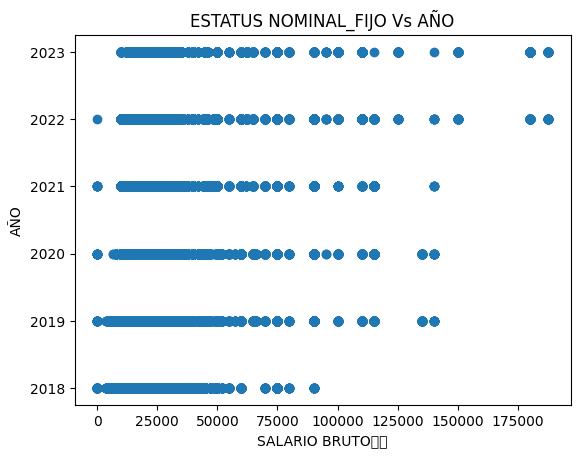

In [136]:
import matplotlib.pyplot as plt
plt.scatter(x =data_2['SALARIO BRUTO'], y=data_2['AÑO'])
plt.title('ESTATUS NOMINAL_FIJO Vs AÑO')
plt.xlabel('SALARIO BRUTO		')
plt.ylabel('AÑO')
plt.show()

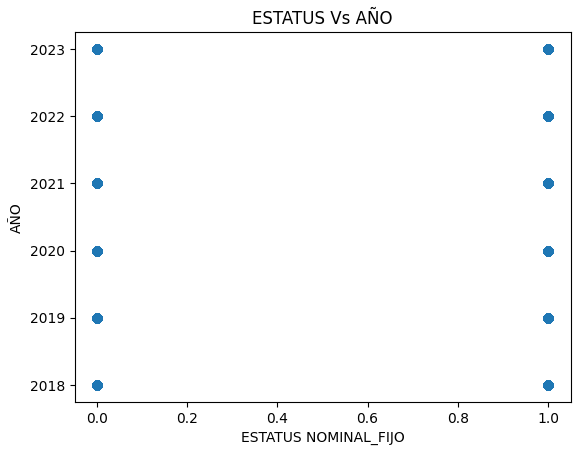

In [127]:
plt.scatter(x = data_2['ESTATUS NOMINAL_FIJO'], y=data_2['AÑO'])
plt.title('ESTATUS Vs AÑO')
plt.xlabel('ESTATUS NOMINAL_FIJO')
plt.ylabel('AÑO')
plt.show()

In [137]:
datos_entrenamiento = data_2.sample(frac=0.8,random_state=0)
datos_test = data_2.drop(datos_entrenamiento.index)

In [138]:
datos_entrenamiento

,SALARIO BRUTO,AÑO,ESTATUS NOMINAL_FIJO,SEXO_F,SEXO_M,MES_Abril,MES_Agosto,MES_Diciembre,MES_Enero,MES_Febrero,MES_Julio,MES_Junio,MES_Marzo,MES_Mayo,MES_Noviembre,MES_Octubre,MES_Septiembre
62928,18000.0,2023,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
70057,21500.0,2023,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
47776,18000.0,2021,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
28645,22000.0,2020,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
60890,25000.0,2022,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,115000.0,2022,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
25557,13200.0,2019,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
58916,25000.0,2022,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
32025,22000.0,2020,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [139]:
datos_test

,SALARIO BRUTO,AÑO,ESTATUS NOMINAL_FIJO,SEXO_F,SEXO_M,MES_Abril,MES_Agosto,MES_Diciembre,MES_Enero,MES_Febrero,MES_Julio,MES_Junio,MES_Marzo,MES_Mayo,MES_Noviembre,MES_Octubre,MES_Septiembre
5,9500.0,2018,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
10,6000.0,2018,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
13,22500.0,2018,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
20,5500.0,2018,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
21,10000.0,2018,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72624,18000.0,2023,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
72629,100000.0,2023,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
72633,50000.0,2023,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
72634,40000.0,2023,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [140]:
etiquetas_entrenamiento

62928    2023
70057    2023
47776    2021
28645    2020
60890    2022
         ... 
51644    2022
25557    2019
58916    2022
32025    2020
72197    2023
Name: AÑO, Length: 58118, dtype: int64

In [141]:
etiquetas_test

5        2018
10       2018
13       2018
20       2018
21       2018
         ... 
72624    2023
72629    2023
72633    2023
72634    2023
72635    2023
Name: AÑO, Length: 14529, dtype: int64

In [ ]:

'''
nombres_columnas = {'ESTATUS NOMINAL': 'Estado Nominal', 'SEXO_SEXO': 'Género'}
datos_entrenamiento = pd.get_dummies(datos_entrenamiento, columns=['ESTATUS NOMINAL', 'SEXO'])
datos_entrenamiento = datos_entrenamiento.rename(columns=nombres_columnas)
print(datos_entrenamiento)
'''


In [142]:
modelo = DecisionTreeClassifier()
modelo .fit(datos_entrenamiento,etiquetas_entrenamiento)

DecisionTreeClassifier()

In [146]:
predicciones = modelo.predict(datos_test)
predicciones

array([2018, 2018, 2018, ..., 2023, 2023, 2023])

En la clasificación binaria, estás dividiendo tus datos en dos clases o categorías distintas. Por ejemplo, podrías estar interesado en clasificar a los empleados en dos grupos: "empleados elegibles para cierto beneficio" vs. "empleados no elegibles para cierto beneficio".

Para aplicar este concepto a tu conjunto de datos, primero necesitarías tener una variable objetivo (target variable) que represente las dos clases que estás tratando de predecir. Por ejemplo, podrías tener una variable llamada "elegibilidad_para_beneficio" que tome el valor de 1 si el empleado es elegible y 0 si no lo es.

In [147]:
accuracy = accuracy_score(etiquetas_test, predicciones)
print("Precisión:", accuracy)


Precisión: 1.0
